In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
df = pd.read_excel('2019년 05월  교통카드 통계자료.xls', 
                 sheet_name=3, encoding='cp949', skiprows)
df.shape

(598, 53)

In [12]:
df0=df.drop(0)

In [13]:
df0.head(2)

,사용월,호선명,역ID,지하철역,04:00:00~04:59:59,Unnamed: 5,05:00:00~05:59:59,Unnamed: 7,06:00:00~06:59:59,Unnamed: 9,...,Unnamed: 43,00:00:00~00:59:59,Unnamed: 45,01:00:00~01:59:59,Unnamed: 47,02:00:00~02:59:59,Unnamed: 49,03:00:00~03:59:59,Unnamed: 51,작업일시
1,2019-05,1호선,150.0,서울역,"1,148",21,"11,958","10,579","15,684","61,286",...,"22,083","4,127","7,762",3,548,0,0,0,0,2019-06-03 10:56:25
2,2019-05,1호선,151.0,시청,89,5,"2,843","4,674","4,169","24,963",...,"4,767",931,"1,426",1,25,0,0,0,0,2019-06-03 10:56:25


출근 시간대 / 에 사람들이 가장 많이타고 내리는 역 / 은 어딜까
- 출근 시간대는 언제인가? : 새벽~오전9시
- 타는 역/ 내리는 역 : 정렬해서 큰수 10개를 자름(mask로 조건부 검색) sum?
- 상위 10개 역

In [71]:
출근시간시작위치 = -11
df = df.replace(',', '', regex=True)
df=df.dropna() # 누락값이 있는 행은 버린다
df.head(3)
arr = np.array(df)
역이름 = arr[:,3]
역별승차인원 = arr[:, 출근시간시작위치].astype(np.int)
#역별승차인원
#x=np.sum(arr[:, 4:13].astype(np.int), 1)

In [79]:
k=10
hold = np.sort(역별승차인원)[-k]
hold

42696

In [84]:
mask = 역별승차인원 >= hold 
역별승차인원[mask], 역이름[mask]

(array([ 48067,  78429,  48786, 128937,  50264,  42696, 151504,  74678,
         55240,  43998]),
 array(['종각', '건대입구', '잠실(송파구청)', '강남', '사당', '합정', '홍대입구', '신촌', '혜화',
        '명동'], dtype=object))

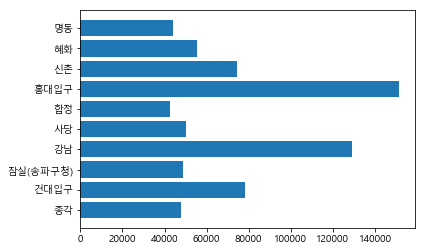

In [85]:
m = plt.rc('font', family='Malgun Gothic')
m = plt.barh(역이름[mask], 역별승차인원[mask])

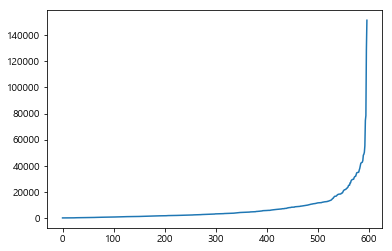

In [88]:
m = plt.plot(np.sort(역별승차인원))

<BarContainer object of 2 artists>

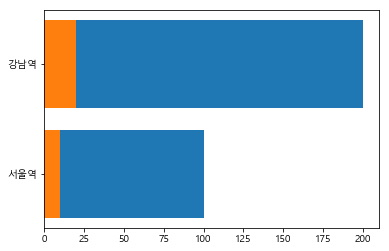

In [90]:
plt.rc('font', family='Malgun Gothic')
plt.barh(['서울역','강남역'], [100, 200])
plt.barh(['서울역','강남역'], [10, 20])

In [ ]:
# 18 , 11시 가장 많이 타는